In [2]:
import numpy as np
import matplotlib.pyplot as plt

F_T0 = 0.0548 # Total inlet molar flow rate
F_C2H6_0 = 0.0183 # Inlet ethane molar flow rate
F_Br2_0 = 2 * F_C2H6_0 # Inlet bromine molar flow rate
X_cond = 0.659 # Conversion at condensation 
v0 = 1 # Initial volumetric flow rate [=] dm^3/s

X = np.linspace(0, 1, 1000) # range of conversion

# Before condensation

F_C2H6 = F_C2H6_0 * (1 - X)
F_Br2 = F_Br2_0 * (1 - X)
F_C2H4Br2 = F_C2H6_0 * X
F_HBr = 2 * F_C2H4Br2
F_T = np.full_like(X, F_T0) # array of shape X containing all F_T0 since molar flow rate is constant before condensation

# After condensation, molar flow rate decreases linearly
slope = -(F_C2H6_0 / (1 - X_cond))
F_T[X > X_cond] = F_T0 + (slope * (X[X > X_cond] - X_cond)) # index to grab values of conversion array above X_cond

# Adjust volumetric flow rate accordingly

v = np.full_like(X, v0) 
v[X > X_cond] = v0 * (F_T[X > X_cond]/F_T0)

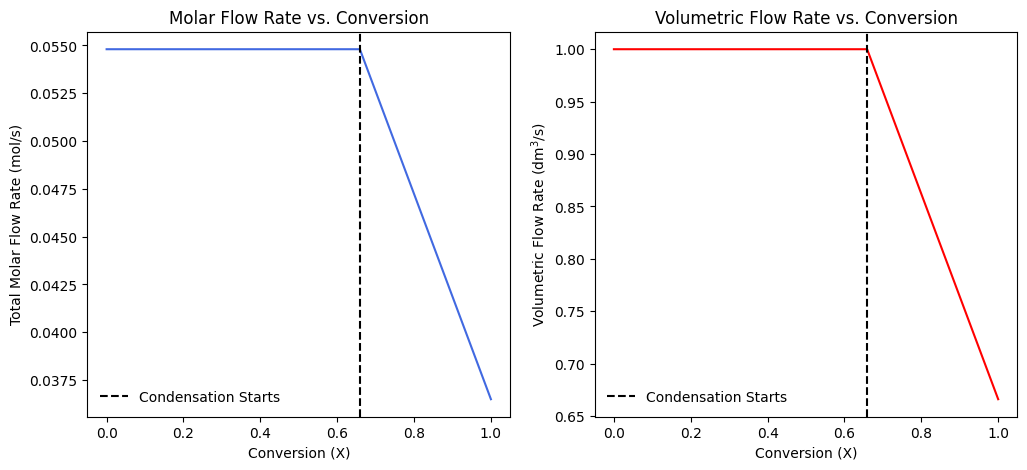

In [3]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(X, F_T, color = 'royalblue')
ax[0].axvline(X_cond, linestyle = '--', color = 'k', label = "Condensation Starts")
ax[0].set_xlabel("Conversion (X)")
ax[0].set_ylabel("Total Molar Flow Rate (mol/s)")
ax[0].legend(frameon = False)
ax[0].set_title("Molar Flow Rate vs. Conversion")

ax[1].plot(X, v, color = 'r')
ax[1].axvline(X_cond, linestyle = '--', color = 'k', label = "Condensation Starts")
ax[1].set_xlabel("Conversion (X)")
ax[1].set_ylabel(r"Volumetric Flow Rate (dm$^3$/s)")
ax[1].legend(frameon = False)
ax[1].set_title("Volumetric Flow Rate vs. Conversion")
plt.show();

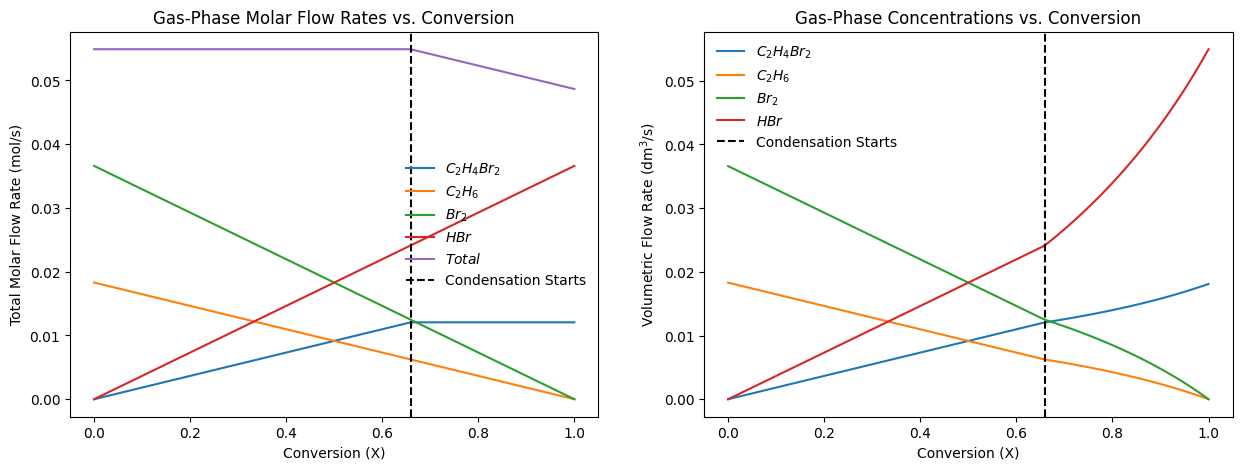

In [4]:
F_T0 = 0.0548 # Total inlet molar flow rate
F_C2H6_0 = 0.0183 # Inlet ethane molar flow rate
F_Br2_0 = 2 * F_C2H6_0 # Inlet bromine molar flow rate
X_cond = 0.659 # Conversion at condensation 
v0 = 1 # Initial volumetric flow rate [=] dm^3/s

X = np.linspace(0, 1, 100) # range of conversion

# Before condensation

F_C2H6 = F_C2H6_0 * (1 - X)
F_Br2 = F_Br2_0 * (1 - X)
F_C2H4Br2 = F_C2H6_0 * X
F_HBr = 2 * F_C2H4Br2
F_T = np.full_like(X, F_T0) # array of shape X containing all F_T0 since molar flow rate is constant before condensation

# After condensation, molar flow rate decreases linearly
slope = -(F_C2H6_0 / (1 - X_cond))
F_T[X > X_cond] = F_T0 + (slope * (X[X > X_cond] - X_cond)) # index to grab values of conversion array above X_cond

# Adjust volumetric flow rate accordingly to be constant before condensation and decrease linearly afterwards 

v = np.full_like(X, v0) 
v[X > X_cond] = v0 * (F_T[X > X_cond]/F_T0)

# Gas phase molar flow rates
F_C2H4Br2_gas = np.copy(F_C2H4Br2)
F_C2H4Br2_gas[X > X_cond] = F_C2H6_0 * X_cond # constant after condensation

F_C2H6_gas = F_C2H6 # ethane always gas phase
F_Br2_gas = F_Br2 # bromine always gas phase
F_HBr_gas = F_HBr # HBr always gas phase

# Total gas=phase molar flow rate adjusted for condensation

F_T_gas = F_C2H4Br2_gas + F_C2H6_gas + F_Br2_gas + F_HBr_gas

# Gas phase concentrations (C = F/v)

C_C2H6 = F_C2H6_gas/v
C_Br2 = F_Br2_gas/v
C_C2H4Br2 = F_C2H4Br2_gas/v
C_HBr = F_HBr_gas/v

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(X, F_C2H4Br2_gas, label = r"$C_2 H_4 Br_2$")
ax[0].plot(X, F_C2H6_gas, label = r"$C_2 H_6 $")
ax[0].plot(X, F_Br2_gas, label = r"$Br_2 $")
ax[0].plot(X, F_HBr_gas, label = r"$HBr $")
ax[0].plot(X, F_T_gas, label = r"$Total$")
ax[0].axvline(X_cond, linestyle = '--', color = 'k', label = "Condensation Starts")
ax[0].set_xlabel("Conversion (X)")
ax[0].set_ylabel("Total Molar Flow Rate (mol/s)")
ax[0].legend(frameon = False)
ax[0].set_title("Gas-Phase Molar Flow Rates vs. Conversion")

ax[1].plot(X, C_C2H4Br2, label = r"$C_2 H_4 Br_2$")
ax[1].plot(X, C_C2H6, label = r"$C_2 H_6 $")
ax[1].plot(X, C_Br2, label = r"$Br_2 $")
ax[1].plot(X, C_HBr, label = r"$HBr $")
ax[1].axvline(X_cond, linestyle = '--', color = 'k', label = "Condensation Starts")
ax[1].set_xlabel("Conversion (X)")
ax[1].set_ylabel(r"Volumetric Flow Rate (dm$^3$/s)")
ax[1].legend(frameon = False)
ax[1].set_title("Gas-Phase Concentrations vs. Conversion")
plt.show();